Hola **Constanza**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>  Hola PAtricio, muchas gracias por tus observaciones y comentarios, son muy importantes para mí para hacer mejor mis análisis. Te envío nuevamente mi proyecto con tus comentarios ya aplicados.

# **PROYECTO SPRINT 9**

## **Descripción del proyecto**

Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

- Registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
- Un archivo con los pedidos en este periodo;
- Estadísticas de gastos de marketing.

Lo que vas a investigar: 

- Cómo los clientes usan el servicio;
- Cuándo empiezan a comprar;
- Cuánto dinero aporta cada cliente a la compañía;
- Cuándo los ingresos cubren el costo de adquisición de los clientes.

### **Descripción de los datos**

1. La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario.
- Device: dispositivo del usuario.
- Start Ts: fecha y hora de inicio de la sesión.
- End Ts: fecha y hora de término de la sesión.
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

2. La tabla orders (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido.
- Buy Ts: fecha y hora del pedido. Revenue: el ingreso de Showz por el pedido.

3. La tabla costs (datos sobre gastos de marketing):

- source_id: identificador de la fuente de anuncios.
- dt: fecha.
- costs: gastos en esta fuente de anuncios en este día.

#### **Instrucciones para completar el proyecto**

### **Paso 1. Acceder los datos y prepararlos para el análisis**

In [1]:
# Importar liberías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

#### **1.1. Análisis datos del DataFrame 'visits'**

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
# Renombrar columnas aplicando...

visits = visits.rename(columns={'Device': 'device', 
              'End Ts': 'session_end_ts', 
              'Source Id': 'source_id', 
              'Start Ts': 'session_start_ts', 
              'Uid': 'uid'})

In [6]:
# Cambio de tipo de datos de las columnas session_end_ts y session_start_ts de object a datetime

visits['session_end_ts'] = pd.to_datetime(visits['session_end_ts'], format='%Y-%m-%d %H:%M:%S')

visits['session_start_ts'] = pd.to_datetime(visits['session_start_ts'], format='%Y-%m-%d %H:%M:%S')

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   device            359400 non-null  object        
 1   session_end_ts    359400 non-null  datetime64[ns]
 2   source_id         359400 non-null  int64         
 3   session_start_ts  359400 non-null  datetime64[ns]
 4   uid               359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


El DataFrame 'visits' cuenta con los datos sobre las visitas al sitio de Showz. Contiene 5 columnas de las cuales varias contiene fechas con fecha de inicio y finalización de sesión. Con la fución info ( ), observe que el tipo de datos era tipo object, por lo tanto fue necesario hacer el cambio al tipo de datos datetime, siendo el tipo de datos corectos y que permitirá extraer más adelante las fechas para realizar los analisis necesarios. 

Este DataFrame tiene la misma cantidad de valores no nulos en todas sus columnas, por lo que se puede decir que no tiene valores ausentes. Además se cambiaron los nombres de las columnas aplicando el formato de snake_case.

#### **1.2. Análisis datos del DataFrame 'orders'**

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
# Renombrar columnas aplicando...

orders = orders.rename(columns={'Buy Ts': 'session_buy_ts', 
              'Revenue': 'revenue', 
              'Uid': 'uid'})

In [11]:
# Cambio de tipo de datos de la columna session_buy_ts de object a datetime

orders['session_buy_ts'] = pd.to_datetime(orders['session_buy_ts'], format='%Y-%m-%d %H:%M:%S')

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_buy_ts  50415 non-null  datetime64[ns]
 1   revenue         50415 non-null  float64       
 2   uid             50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


El DataFrame 'oders' cuenta con los datos sobre los pedidos en el sitio web de Showz. Contiene 3 columnas, de las cuales Buy Ts contiene las fechas y horas del pedido. Con la fución info ( ), observe que el tipo de datos era tipo object, por lo tanto fue necesario hacer el cambio al tipo de datos datetime, siendo el tipo de datos corectos y que permitirá extraer más adelante las fechas para realizar los analisis necesarios. 

Este DataFrame tiene la misma cantidad de valores no nulos en todas sus columnas, por lo que se puede decir que no tiene valores ausentes. Además se cambiaron los nombres de las columnas aplicando el formato de snake_case.

#### **1.3. Análisis datos del DataFrame 'costs'**

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [14]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [15]:
# Cambio de tipo de datos de la columna dt de object a datetime

costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


El DataFrame 'costs' cuenta con los datos sobre los gastos de marketing para promocionoar los productos del sitio web de Showz. Contiene 3 columnas, de las cuales dt contiene las fechas y horas del pedido. Con la fución info ( ), observe que el tipo de datos era tipo object, por lo tanto fue necesario hacer el cambio al tipo de datos datetime, siendo el tipo de datos corectos y que permitirá extraer más adelante las fechas para realizar los analisis necesarios. 

Este DataFrame tiene la misma cantidad de valores no nulos en todas sus columnas, por lo que se puede decir que no tiene valores ausentes. 




<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el análisis inicial de tus dataset, siempre es importante primero revisar la calidad de los datos y el tipo de los mismos antes de pasar a cualquier análisis
</div>

### **Paso 2. Hacer informes y calcular métricas**

### **2.1 Visitas**

#### **2.1.1 ¿Cuántas personas lo usan cada día, semana y mes?**

In [17]:
# Extraer las fechas del DataFrame de visits

visits['session_month'] = visits['session_start_ts'].dt.to_period('M').dt.start_time

visits['session_week'] = visits['session_start_ts'].dt.isocalendar().week

visits['session_date'] = visits['session_start_ts'].dt.date

In [18]:
visits.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,2017-12-27


In [19]:
# ¿Cuántas personas lo usan cada día, semana y mes?

dau = visits.groupby('session_date').agg({'uid': 'nunique'})
wau = visits.groupby('session_week').agg({'uid': 'nunique'})
mau = visits.groupby('session_month').agg({'uid': 'nunique'})

print('DAU:', int(dau.mean()), 'visitantes diarios')
print('WAU:', int(wau.mean()), 'visitantes semanales')
print('MAU:', int(mau.mean()), 'visitantes mensuales')

DAU: 907 visitantes diarios
WAU: 5825 visitantes semanales
MAU: 23228 visitantes mensuales


Del DataFrame de 'visits', se obtuieron 3 nuevas columnas en donde se muestran la sesiones para día, semana y mes de los usuarios en el sitio web de Showz. Para obtener los valores los usuarios diarios, semanales y mensuales, se realizó una agrupación con las fechas para cada uno de estos tiempos, utilizando la columna de identificación del usuario con los valores únicos. Aplicando el método mean( ), se obtuvieron los valores DAU para el promedio de los usuarios diarios, WAU para el promedio de los usuarios semanales y MAU para el promedio de los usuarios mensuales.

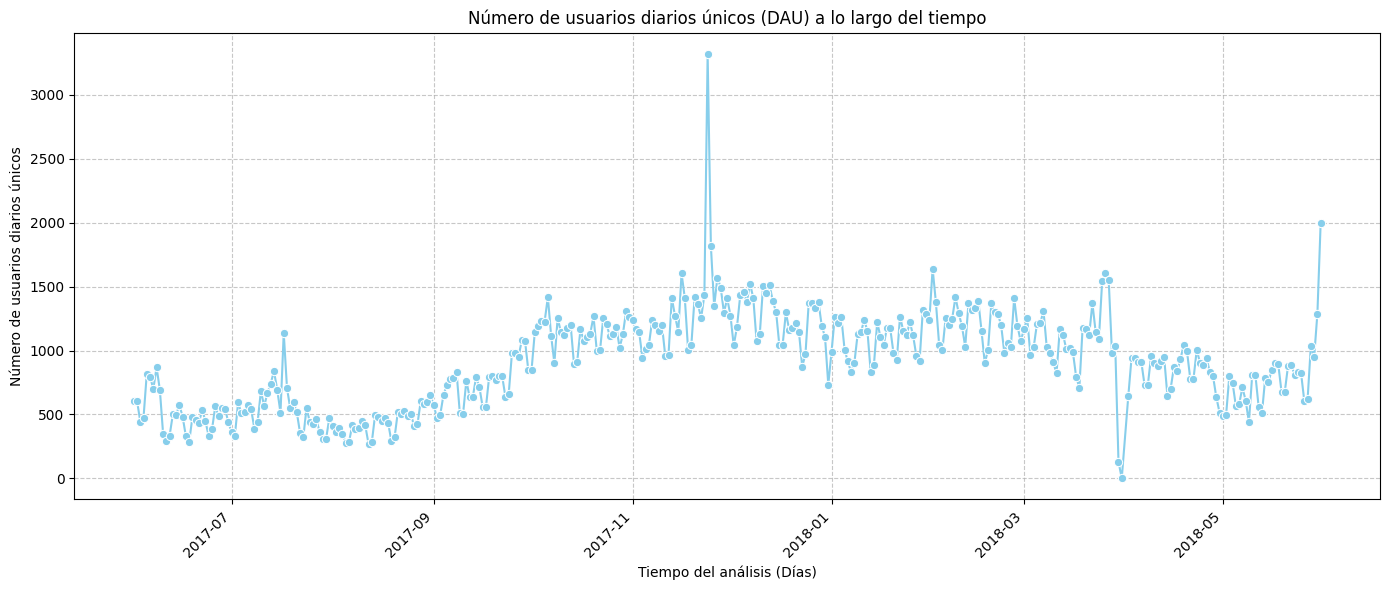

In [20]:
# Gráfica de número de usuarios diarios únicos, DAU a lo largo del tiempo de análisis 

# Extraer la el día de la columna 'session_start_ts'
visits['session_date'] = visits['session_start_ts'].dt.date

# Agrupar por fecha y contar usuarios únicos
dau = visits.groupby('session_date')['uid'].nunique().reset_index()
dau.columns = ['date', 'dau']

# Convertir la columna 'date' de vuelta a datetime para graficar
dau['date'] = pd.to_datetime(dau['date'])

plt.figure(figsize=(14, 6))

sns.lineplot(data=dau, x='date', y='dau', marker='o', color='skyblue')
plt.title('Número de usuarios diarios únicos (DAU) a lo largo del tiempo')
plt.xlabel('Tiempo del análisis (Días)')
plt.ylabel('Número de usuarios diarios únicos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

De esta gráfica de los usuarios diarios únicos (DAU), se puede observar que la mayor frecuencia de visitas se dan enun rango entre 300 y 1500 usuarios diarios. Sin embargo, en se presentan datos atípicos como el punto que se observa en epocas de navidad de 2017, en donde se obtuvo un registro de casi 3500 usuarios únicos que podría deberser a las promociones y descuentos que pudo haber tenido Show como su estrategia de marqueking.
Otro punto que llama la atención es para el mes de abril de 2018, en donde se presentó un registro de 0 usuarios, posiblemente porque la página pudo haber presentado un fallo en un lapso de 2 días.

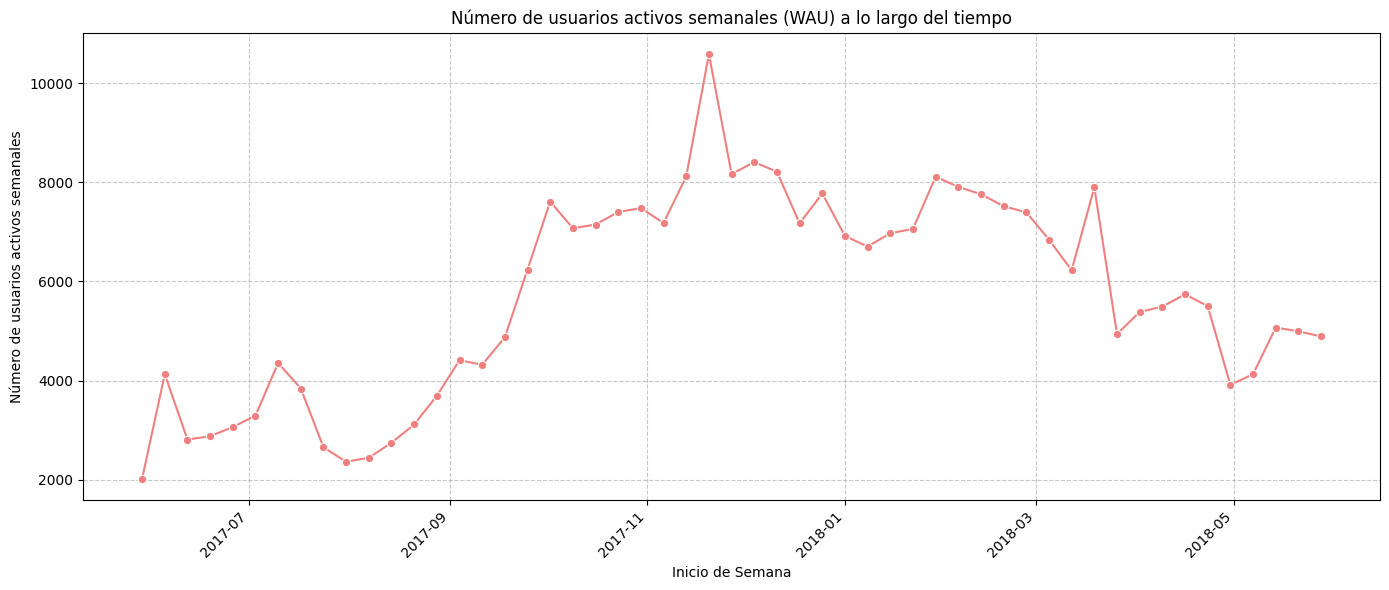

In [21]:
# Gráfica del número de usuarios activos semanales, WAU a lo largo del tiempo de análisis

# Extraer la semana del año de 'session_start_ts'
visits['session_week'] = visits['session_start_ts'].dt.to_period('W') 

# Agrupar por semana y contar usuarios únicos
wau = visits.groupby('session_week')['uid'].nunique().reset_index()
wau.columns = ['week', 'wau']

# Convertir la columna 'week' a la fecha de inicio de la semana para graficar 
wau['week_start_date'] = wau['week'].dt.start_time

plt.figure(figsize=(14, 6))

sns.lineplot(data=wau, x='week_start_date', y='wau', marker='o', color='lightcoral')
plt.title('Número de usuarios activos semanales (WAU) a lo largo del tiempo')
plt.xlabel('Inicio de Semana')
plt.ylabel('Número de usuarios activos semanales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

De la gráfica 'Número de usuarios activos semanales (WAU) a lo largo del tiempo', se puede observar que hubo un aumento desde la fecha inicio de este análisis junio-2017 hasta mediados de dicimebre de 2017 aproximadamente. Para dicimebre de 2017, los usuarios semanales estuvieron por encima de los 8000 usuarios activos únicos semanales. Después de la tercera semana de diciembre, se presenta una disminución semanal de visitas de los usuarios. Para esta misma época de navidad se presenta un valor atípico, en el cual los usuarios activos por semana estuvieron por encima de los 10000 usuarios, coincidiento con el mismo valor atípico de la gráfica anterior del DAU.

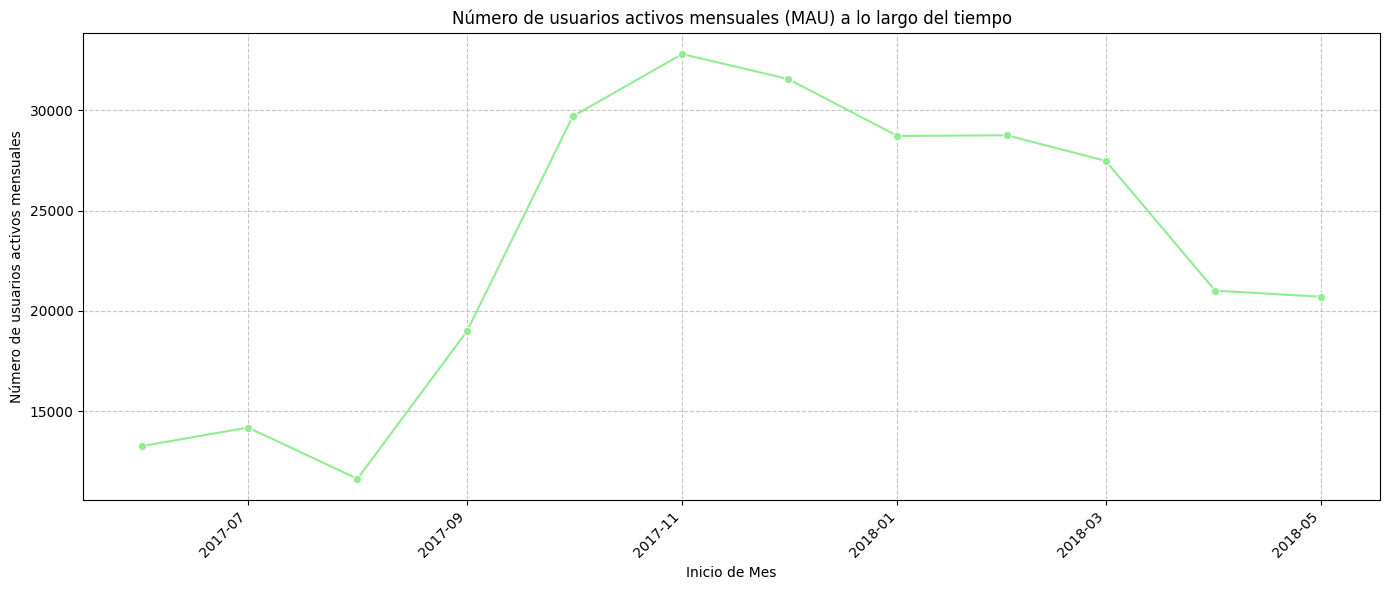

In [22]:
# Gráfica del número de usuarios activos mensuales, MAU a lo largo del tiempo de análisis

# Extraer el mes del año de 'session_start_ts'
visits['session_month'] = visits['session_start_ts'].dt.to_period('M') 

# Agrupar por mes y contar usuarios únicos
mau = visits.groupby('session_month')['uid'].nunique().reset_index()
mau.columns = ['month', 'mau']

# Convertir la columna 'month' a la fecha de inicio del mes para graficar 
mau['month_start_date'] = mau['month'].dt.start_time
mau

plt.figure(figsize=(14, 6))

sns.lineplot(data=mau, x='month_start_date', y='mau', marker='o', color='lightgreen')
plt.title('Número de usuarios activos mensuales (MAU) a lo largo del tiempo')
plt.xlabel('Inicio de Mes')
plt.ylabel('Número de usuarios activos mensuales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

De la gráfica 'Número de usuarios activos mensuales (MAU) a lo largo del tiempo' se observa con mayor claridad que los datos atípicos que se presentaron en las dos gráficas anteriores corresponden a temporada navideña, específicamente a Thanksgiving Day. Posiblemente, muchos de los usuarios aprovecharon los promociones y ofertas que Show ofreció a sus usuarios y por tanto se presentó mayores visitas para este día. 
De igual forma que las dos gráficas anteriores, se presentó un aumento de usuarios desde junio-2017 hasta diciembre de este mismo año. Luego, el número de usuarios fue disminuyendo hasta mayo de 2018, fecha en la se finalizó este análisis.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para complementar mejor lo que se muestra de estos cálculos podrías utilizar gráficas de líneas ya que al tratarse de datos temporales se pueden identificar tendencias
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Así es mucho más claro lo que se quiere comunicar con las gráficas
</div>

#### **2.1.2 ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)**

In [23]:
# Calcular las sesiones por usuario

session_user = visits.groupby('session_date').agg({'uid': ['count', 'nunique']})

session_user.columns = ['n_sessions', 'n_users']

session_user

,n_sessions,n_users
session_date,,
2017-06-01,664,605
2017-06-02,658,608
2017-06-03,477,445
2017-06-04,510,476
2017-06-05,893,820
...,...,...
2018-05-27,672,620
2018-05-28,1156,1039
2018-05-29,1035,948


In [24]:
session_user['session_per_user'] = session_user['n_sessions'] / session_user['n_users']

session_user.head()

,n_sessions,n_users,session_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [25]:
print('Promedio de sesiones por usuario {} por día'.format(round(session_user['session_per_user'].mean(), 2)))

Promedio de sesiones por usuario 1.08 por día


Para saber cuantas sesiones hay por día en el sitio web, se realizó una agrupación por la nueva columna de sesiones por día, contando los valores únicos de cada usuario y los números de sesiones por día. 

Luego se obuto otra columna en donde se realizó el cálculo de sesiones por usuario al día, para así poder obtener el promedio de sesiones por usuarios, siendo de 1.08 en promedio por día.

#### **2.1.3 ¿Cuál es la duración de cada sesión?**

In [26]:
# Calcular la duración de las sesiones en segundos y convertilas en minutos

visits['session_duration'] = (visits['session_end_ts'] - visits['session_start_ts']).dt.seconds

visits['session_duration'] = visits['session_duration']/60

visits['session_duration']

0         18.000000
1         28.000000
2          0.000000
3         24.000000
4          0.000000
            ...    
359395     0.316667
359396     0.316667
359397     0.316667
359398     0.316667
359399     0.316667
Name: session_duration, Length: 359400, dtype: float64

In [27]:
# Mostrar las estadisticas descriptivas de la duración de sesiones por los usuraios

visits['session_duration'].describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: session_duration, dtype: float64

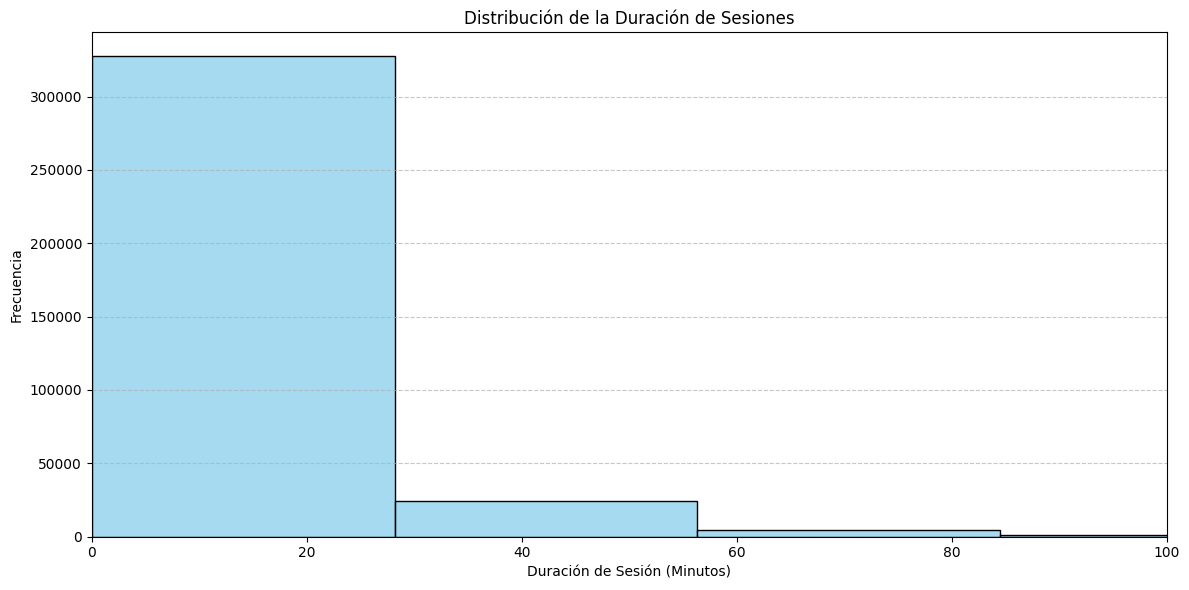

In [28]:
# Histograma de duración de la sesión de los usuarios

plt.figure(figsize=(12, 6)) 

sns.histplot(
    data=visits,
    x='session_duration',
    bins=50,                       
    color='skyblue',     
    edgecolor='black',   
    log_scale=False)

plt.xlim(0, 100)
plt.title('Distribución de la Duración de Sesiones')
plt.xlabel('Duración de Sesión (Minutos)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

La duración de cada sesion se obtuvo de la diferencia de las columnas de la hora en que finalizó la sesión y la hora en la inició la sesión, obteniendo estos valores en minutos para hacerlo de facil comprensión.

A la columna obtenida de duración de la sesión se le aplicó el método describe( ) con la finalidad de obtener las estadísticas. En esta información se puede observar que el tiempo promedio de cada sesión es de casi 11 minutos. Se muestra una desviasión estandar de 17 minutos indicando que hubo sesiones con un tiempo de duración más largo, se puede confirmar este valor con el valor máximo de esta columna 1408 minutos, casi 24horas, pudo hacer sido algún usuario que dejó la sesión abierta duante todo este tiempo de forma continua. 

Por otra parte, se puede observar que en el valor minimo se obtiene 0.00, indicanco que hubo algún usuario (o varios) que entraron y se salieron muy pronto. Esto se puede verificar con el porcentil 25%, en donde el 25% de los usuarios tuvieron una duración de sesión menor a 2 minutos.

Del histograma se puede concluir que la mayor frecuencia de duración de la sesión de los usuarios se da entre 0 y 28 minutos aproximadamente.

#### **2.1.4 ¿Con qué frecuencia los usuarios regresan?**

In [29]:
# Encontrar las primeras sesiones

first_visits = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()

first_visits.columns = ['uid', 'first_session_start_ts']

first_visits.head()

,uid,first_session_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [30]:
# Extraer las fechas de la primera sesión día
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date

# Extraer las fechas de la primera sesión mes
first_visits['first_session_month'] = first_visits['first_session_start_ts'].dt.to_period('M').dt.start_time

In [31]:
# Unir DataFrame first_visits y visits

visits_complete = pd.merge(first_visits, visits, on='uid')

visits_complete.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,device,session_end_ts,source_id,session_start_ts,session_month,session_week,session_date,session_duration
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03,2018-02-26/2018-03-04,2018-03-01,6.0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02,2018-02-05/2018-02-11,2018-02-06,2.0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06,2017-06-05/2017-06-11,2017-06-07,1.0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03,2018-03-05/2018-03-11,2018-03-11,6.0
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09,2017-09-18/2017-09-24,2017-09-18,18.0


In [32]:
# Calcular el ciclo de vida 

visits_complete['life_cicle'] = visits_complete['session_month'].dt.month - visits_complete['first_session_month'].dt.month

visits_complete['life_cicle'] += 12 * (visits_complete['session_month'].dt.year - visits_complete['first_session_month'].dt.year)

visits_complete.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,device,session_end_ts,source_id,session_start_ts,session_month,session_week,session_date,session_duration,life_cicle
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03,2018-02-26/2018-03-04,2018-03-01,6.0,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02,2018-02-05/2018-02-11,2018-02-06,2.0,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06,2017-06-05/2017-06-11,2017-06-07,1.0,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03,2018-03-05/2018-03-11,2018-03-11,6.0,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09,2017-09-18/2017-09-24,2017-09-18,18.0,0


In [33]:
# Tasa de Retención

cohorts = visits_complete.pivot_table(
    index = 'first_session_month', 
    columns = 'life_cicle', 
    values = 'uid', 
    aggfunc = 'nunique'
)
cohorts.fillna('')

life_cicle,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


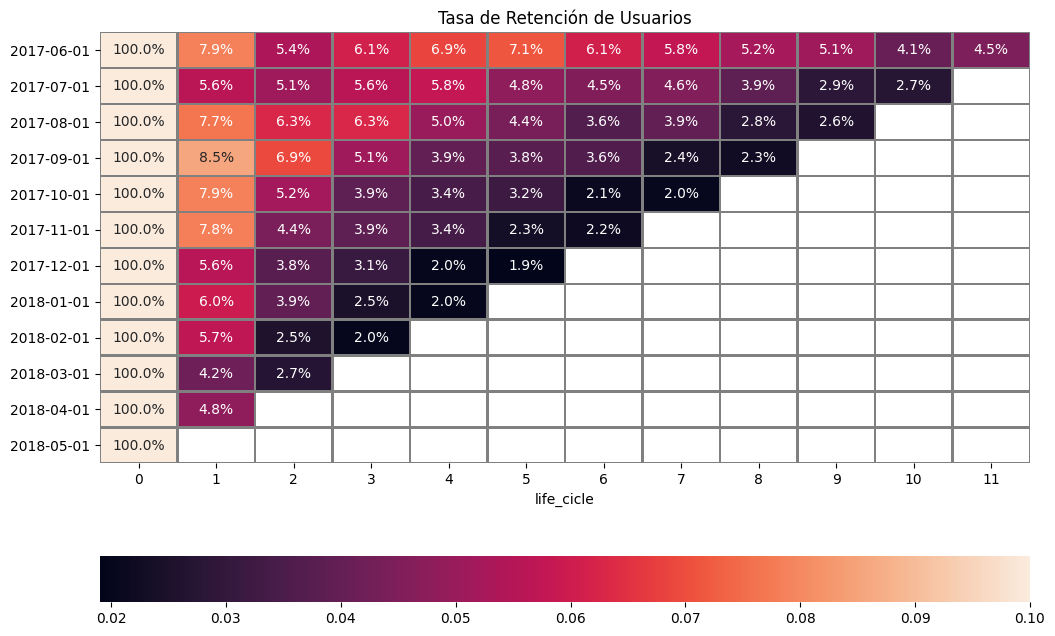

In [34]:
# Gráfica de Tasa de Retención

retencion= pd.DataFrame()

for col in cohorts.columns:
    retencion = pd.concat([retencion, cohorts[col]/cohorts[0]], axis=1)
retencion.columns = cohorts.columns
retencion.index = [str(x)[0:10] for x in retencion.index]

plt.figure(figsize=(12, 8))
plt.title('Tasa de Retención de Usuarios')
sns.heatmap(retencion, 
    annot=True, 
    fmt='.1%', 
    linewidths=1, 
    linecolor='grey', 
    vmax=0.1, 
    cbar_kws={'orientation': 'horizontal'})
plt.show()

Para obtener la información de la frecuencia con la que regresan los usuarios se debieron realizar varios pasos.

1. Se creo un DataFrame con las primeras visitas de los usuarios, agrupando por la identificación de usuario para obtener la sesión de inicio más antigua. De esta forma se obtubo la primera sesión de cada usiario.
2. Se extrajo la fecha de la primera sesión de cada usuario por día y por mes.
3. Se unieron el DataFrame el original de visitas y el nuevo DataFrame de primeras visitas, para así obtener el DataFrame completo de visitas.
4. Se realiza esta operación de ciclo de vida por años debido a que están trabajando con diferentes años. Si se calcula el ciclo de vida solo de los meses no me va adevolver el ciclo de vida que necesito, por eso se implenta la operación de los años para obtener el ciclo de vida completo de todo el análisis (frecuencia de los usuarios que regresan). Para este valor se calculó la diferencia entre la columna de sesión mensual y la de la primera sesión mensual del DataFrame ya fusionado de visitas completo.
5. Teniendo ya toda la información compilada en el DataFrame de 'visitas completo', se calculó la tasa de retención para cada cohorte en cada mes sel ciclo de vida que va de junio de 2017 a mayo de 2028.
6. Con la información anterior de la tasa de reteción se graficó el mapa de calor con los porcentajes de retención de los usuarios, con el cual se puede analizar la frecuencia con la que regresan los usuarios.

Del mapa de calor se puede concluir lo siguiente:
1. Para el segundo mes del ciclo de vida, del primer cohorte (2017-06-01), el porcentaje de retención fue de 7.9%, siendo el valor más alto entre todos los meses para este cohorte. Sin embargo, no fue el más alto para este segundo mes del ciclo de vida, el valor más alto fue de 8.5% para el cohorte 2017-09-01.
2. El porcentaje de retención más alto de toda esta gráfica de calor, se dio para el segundo mes del cohorte del 2017-09-01 con un valor de 8.5%.
3. El primer cohorte es el que presenta mayores porcentajes de retención, lo que representa una mayor frecuencia en que regresan los usuarios al sitio web.
4. El último mes de cada cohorte el porcentaje retención se mantiene alrederor del 2%, indicando que la frecuencia con la que regresan los usuarios al sitio web es cada vez menor.
5. En general, la frencuencia con la que regresan los usuarios al sitio web cada vez es mas baja.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cálculos y gráficas mostradas! Cada parte fue mostrada de manera súper clara y la redacción de su interpretación complementa muy bien el mensaje que se quiere comunicar en esta parte del análisis
</div>

### **2.2 Ventas**

#### **2.2.1 ¿Cuándo empieza la gente a comprar?**

En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.

In [35]:
# Extraer las fechas del DataFrame de orders

orders['buy_dt'] = orders['session_buy_ts'].dt.date

orders['order_month'] = orders['session_buy_ts'].dt.to_period('M')

orders.head()

,session_buy_ts,revenue,uid,buy_dt,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06


In [36]:
# Encontrar las primeras ordenes

first_orders = orders.groupby('uid').agg({'session_buy_ts': 'min'}).reset_index()

first_orders.columns = ['uid', 'first_order_ts']

first_orders.head()

,uid,first_order_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [37]:
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date

first_orders['first_order_month'] = first_orders['first_order_ts'].dt.to_period('M')

first_orders

,uid,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11
...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02


In [38]:
# Unir DataFrame 

buyers = pd.merge(first_visits, first_orders, on='uid')

buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11


In [39]:
buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uid                     36523 non-null  uint64        
 1   first_session_start_ts  36523 non-null  datetime64[ns]
 2   first_session_dt        36523 non-null  object        
 3   first_session_month     36523 non-null  datetime64[ns]
 4   first_order_ts          36523 non-null  datetime64[ns]
 5   first_order_dt          36523 non-null  object        
 6   first_order_month       36523 non-null  period[M]     
dtypes: datetime64[ns](3), object(2), period[M](1), uint64(1)
memory usage: 2.2+ MB


In [40]:
# Cambio del tipo de datos de las columnas first_session_dt y first_order_dt

buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])

buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uid                     36523 non-null  uint64        
 1   first_session_start_ts  36523 non-null  datetime64[ns]
 2   first_session_dt        36523 non-null  datetime64[ns]
 3   first_session_month     36523 non-null  datetime64[ns]
 4   first_order_ts          36523 non-null  datetime64[ns]
 5   first_order_dt          36523 non-null  datetime64[ns]
 6   first_order_month       36523 non-null  period[M]     
dtypes: datetime64[ns](5), period[M](1), uint64(1)
memory usage: 2.2 MB


In [41]:
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) / np.timedelta64(1, 'D')).astype('int')

buyers.sample(5)

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase
28711,14486955279582767944,2018-02-15 20:07:00,2018-02-15,2018-02-01,2018-02-16 18:05:00,2018-02-16,2018-02,0
21634,10929023818183061878,2017-07-26 21:52:00,2017-07-26,2017-07-01,2018-01-11 15:13:00,2018-01-11,2018-01,168
3431,1744096272631720051,2018-03-02 13:22:00,2018-03-02,2018-03-01,2018-03-02 13:23:00,2018-03-02,2018-03,0
6385,3219035812560579794,2017-10-01 23:46:00,2017-10-01,2017-10-01,2017-10-02 00:32:00,2017-10-02,2017-10,0
11592,5815661211921793224,2018-04-11 07:44:00,2018-04-11,2018-04-01,2018-04-11 19:09:00,2018-04-11,2018-04,0


Estos son los días que transcurren desde la primera visita hasta la primera compra. 

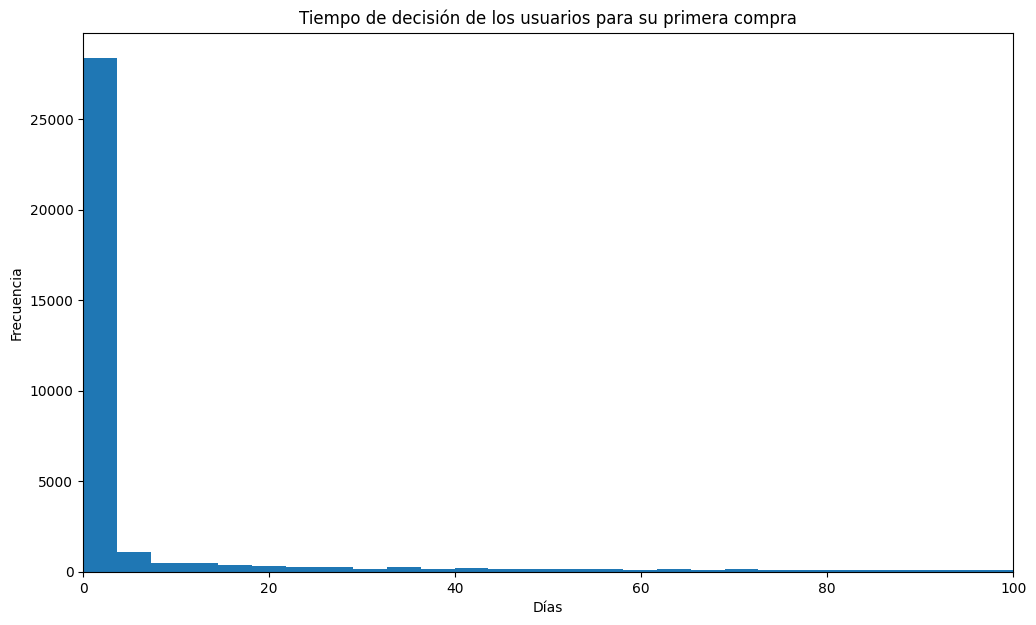

In [42]:
# Histograma de días transcurridos desde la primera sesión hasta la primera compra

buyers['days_to_first_purchase'].plot(kind='hist', bins=100, figsize=(12,7))
plt.title('Tiempo de decisión de los usuarios para su primera compra')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.xlim(0, 100)
plt.show()

Para determinar cuando empieza la gente a comprar, se debierón seguir varios pasos:
1. Extraer las fechas de pedido del DataFrame de ordenes.
2. Encontrar las primeras órdenes realizadas.
3. Luego extraer las fechas del día y las fechas del mes de las primeras órdenes.
4. Se crea el DataFrame de compradores, uniendo las tablas de primeras visitas y primeras órdenes.
5. Se obtiene el DataFrame de buyer con una nueva columna 'days_to_first_purchase' de la diferencia entre las primeras órdenes y la primera sesión de inicio.
6. Por último se grafica un histograma en donde se puede visualizar el tiempo de decisión los usuarios desde su primera visita hasta su primera compra.

De la gráfica del histograma se puede concluir lo siguiente:
1. Es mejor delimitar el eje X a 100 para pover visualizar mejor las barras que tienen mayor frecuencia los primeros 20 días.
2. La mayoría de los usuarios se toman un tiempo de 0 a 3 para su primera compra. La frecuencia de los usuarios, alrededor de 28.000 compran los primeros días.
3. Algunos usuarios, entre 500 y 1000 usuarios se tardan alrederor de unos 20 días para su primera compra.
4. Una cantidad muy pequeña de usuarios se tardan más de 20 días en tomar la decisión de realizar su primera compra.

#### **2.2.2 ¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [43]:
# Encontrar la cantidad de compradores por cada cohorte

cohorts_buyers = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()

cohorts_buyers.rename(columns={'uid': 'n_buyers'}, inplace=True)

cohorts_buyers

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [44]:
# Adicionando el primer mes de orden

cohorts_revenue = pd.merge(orders, buyers, on='uid', how='inner')

cohorts_revenue = cohorts_revenue.groupby(['first_order_month', 'order_month']).agg({'revenue': 'count'}).reset_index()

cohorts_revenue

,first_order_month,order_month,revenue
0,2017-06,2017-06,2354
1,2017-06,2017-07,177
2,2017-06,2017-08,174
3,2017-06,2017-09,226
4,2017-06,2017-10,292
...,...,...,...
74,2018-03,2018-05,176
75,2018-04,2018-04,2495
76,2018-04,2018-05,195
77,2018-05,2018-05,3249


In [45]:
# Calculando el ciclo de vida

cohorts_revenue['life_cicle'] = (cohorts_revenue['order_month'] - cohorts_revenue['first_order_month']).apply(lambda x: x.n)

cohorts_revenue.columns = ['first_order_month', 'order_month', 'n_orders', 'life_cicle']

cohorts_revenue

,first_order_month,order_month,n_orders,life_cicle
0,2017-06,2017-06,2354,0
1,2017-06,2017-07,177,1
2,2017-06,2017-08,174,2
3,2017-06,2017-09,226,3
4,2017-06,2017-10,292,4
...,...,...,...,...
74,2018-03,2018-05,176,2
75,2018-04,2018-04,2495,0
76,2018-04,2018-05,195,1
77,2018-05,2018-05,3249,0


In [46]:
# Contar el número de usuarios y de órdenes

cohorts_report = pd.merge(cohorts_buyers, cohorts_revenue, on='first_order_month')

cohorts_report['orders_per_buyer'] = cohorts_report['n_orders'] / cohorts_report['n_buyers']

cohorts_report

,first_order_month,n_buyers,order_month,n_orders,life_cicle,orders_per_buyer
0,2017-06,2023,2017-06,2354,0,1.163618
1,2017-06,2023,2017-07,177,1,0.087494
2,2017-06,2023,2017-08,174,2,0.086011
3,2017-06,2023,2017-09,226,3,0.111715
4,2017-06,2023,2017-10,292,4,0.144340
...,...,...,...,...,...,...
74,2018-03,3533,2018-05,176,2,0.049816
75,2018-04,2276,2018-04,2495,0,1.096221
76,2018-04,2276,2018-05,195,1,0.085677
77,2018-05,2988,2018-05,3249,0,1.087349


In [47]:
# Analisis del reporte de cohortes

cohorts_analyse = cohorts_report.pivot_table(
    index = 'first_order_month',
    columns = 'life_cicle',
    values = 'orders_per_buyer',
    aggfunc = 'sum'
).cumsum(axis=1)

cohorts_analyse.round(3).fillna('')

life_cicle,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.164,1.251,1.337,1.449,1.593,1.701,1.837,1.923,2.028,2.104,2.151,2.194
2017-07,1.137,1.189,1.251,1.305,1.343,1.385,1.417,1.443,1.473,1.486,1.513,
2017-08,1.119,1.198,1.271,1.33,1.392,1.437,1.473,1.53,1.564,1.597,,
2017-09,1.136,1.221,1.284,1.347,1.373,1.415,1.457,1.479,1.503,,,
2017-10,1.144,1.216,1.253,1.282,1.311,1.335,1.355,1.384,,,,
2017-11,1.179,1.277,1.321,1.373,1.406,1.421,1.446,,,,,
2017-12,1.153,1.214,1.26,1.301,1.321,1.345,,,,,,
2018-01,1.122,1.188,1.235,1.254,1.277,,,,,,,
2018-02,1.122,1.182,1.205,1.224,,,,,,,,


In [48]:
print('El promedio de órdenes por cliente es:', round(cohorts_analyse[5].mean(), 2))

El promedio de órdenes por cliente es: 1.43


Para saber cuantas órdenes se realizan por cliente, primero se encontraron los cliente que realizaron comprar en cada cohorte, cohorts_buyers. 
Luego se obtubo un DataFrame con los valores de first_order_month, order_month y revenue (conteo de los ingresos, n_orders) y se calculó el ciclo de vida. 
Después se obtuvo las ordenes por comprador, presentandose en una tabla dinámica la suma acumulativa de órdenes.

Los comprodarores del primer cohorte correspondiente a junio de 2017 compraron durante todos los cohortes, sin embargo para los demás cohortes, los compradores fueron disminuyendo sus pedidos a los largo de cada uno de sus ciclos de vida.

Por último se obtuvo que el promedio de órdenes por cliente es de 1.43.

#### **2.2.3 ¿Cuál es el tamaño promedio de compra?**

In [49]:
print('El promedio de compra es:', round(orders['revenue'].mean(), 3))

El promedio de compra es: 5.0


In [50]:
# Tabla para visualizar los ingresos totales de cada cohorte

orders_cohort = orders.pivot_table(
    index = 'order_month',
    values = 'revenue',
    aggfunc = 'mean'
)

orders_cohort

,revenue
order_month,
2017-06,4.060106
2017-07,5.306589
2017-08,4.847139
2017-09,5.416448
2017-10,4.928280
2017-11,4.783518
2017-12,5.852139
2018-01,4.112927
2018-02,4.840095


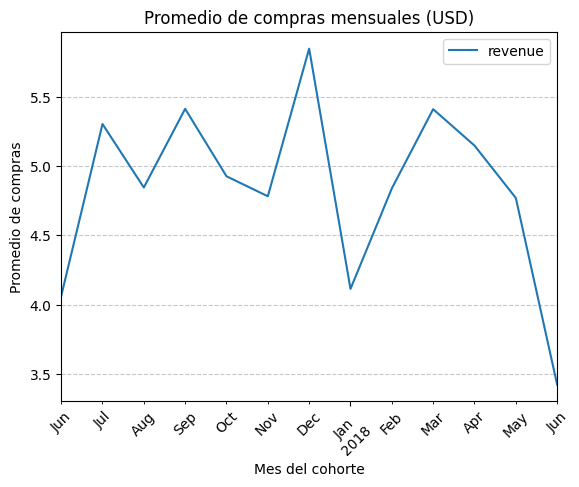

In [51]:
# Gráfica de visualización de compras mensuales

orders_cohort.plot(title='Promedio de compras mensuales (USD)', xlabel="Mes del cohorte", ylabel='Promedio de compras', rot=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Para obtener el tamaño promedio de compra, por medio de la función print, se realizó el cálculo del promedio de la columna 'revenue' del DataFrame de 'orders', obteniendo en valor promedio de compras de 5.

También se realizó una tabla dinamica en donde se obtuvo el tamaño promedio de compra por cada cohorte. Se puede observar tanto en la tabla como en la gráfica, que los valores oscilan entre 4 y 5.8, siendo el cohorte del mes de diciembre de 2017 el que presenta un mayor promedio de compras. La época de navidad pudo influir en este valor, al ser la época del año en la que los usuarios están dispuestos a comprar más.

#### **2.2.4 ¿Cuánto dinero traen?  (LTV)**

In [52]:
# Número de clientes

cohorts_buyers = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()

cohorts_buyers.rename(columns={'uid': 'n_buyers'}, inplace=True)

cohorts_buyers

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [53]:
# Adicionando el primer mes de orden

cohorts_revenue = pd.merge(orders, buyers, on='uid', how='inner')

cohorts_revenue = cohorts_revenue.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

cohorts_revenue

,first_order_month,order_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58
...,...,...,...
74,2018-03,2018-05,1114.87
75,2018-04,2018-04,10600.69
76,2018-04,2018-05,1209.92
77,2018-05,2018-05,13925.76


In [54]:
# Calculando el ciclo de vida

cohorts_revenue['life_cicle'] = (cohorts_revenue['order_month'] - cohorts_revenue['first_order_month']).apply(lambda x: x.n)

cohorts_revenue

,first_order_month,order_month,revenue,life_cicle
0,2017-06,2017-06,9557.49,0
1,2017-06,2017-07,981.82,1
2,2017-06,2017-08,885.34,2
3,2017-06,2017-09,1931.30,3
4,2017-06,2017-10,2068.58,4
...,...,...,...,...
74,2018-03,2018-05,1114.87,2
75,2018-04,2018-04,10600.69,0
76,2018-04,2018-05,1209.92,1
77,2018-05,2018-05,13925.76,0


In [55]:
# Agregando los usuarios para el cálculo del LTV

cohorts_report = pd.merge(cohorts_buyers, cohorts_revenue, on='first_order_month')

cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

cohorts_report

,first_order_month,n_buyers,order_month,revenue,life_cicle,ltv
0,2017-06,2023,2017-06,9557.49,0,4.724414
1,2017-06,2023,2017-07,981.82,1,0.485329
2,2017-06,2023,2017-08,885.34,2,0.437637
3,2017-06,2023,2017-09,1931.30,3,0.954671
4,2017-06,2023,2017-10,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03,3533,2018-05,1114.87,2,0.315559
75,2018-04,2276,2018-04,10600.69,0,4.657597
76,2018-04,2276,2018-05,1209.92,1,0.531599
77,2018-05,2988,2018-05,13925.76,0,4.660562


In [56]:
# Tabla dinámica para los valores de LTV

cohorts_ltv = cohorts_report.pivot_table(
    index = 'first_order_month',
    columns = 'life_cicle',
    values = 'ltv',
    aggfunc = 'sum'
).cumsum(axis=1)

cohorts_ltv.round(3).fillna('')

life_cicle,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724,5.21,5.647,6.602,7.625,8.36,9.311,9.892,10.445,11.051,11.622,11.879
2017-07,6.010,6.345,6.969,7.328,7.505,7.661,7.781,7.923,8.084,8.231,8.387,
2017-08,5.277,5.749,6.207,6.598,7.092,7.376,7.587,7.992,8.284,8.472,,
2017-09,5.645,6.762,7.283,11.259,11.659,12.306,13.008,13.251,13.435,,,
2017-10,5.004,5.539,5.731,5.888,6.04,6.16,6.245,6.36,,,,
2017-11,5.155,5.554,5.753,6.078,6.226,6.28,6.395,,,,,
2017-12,4.738,4.999,5.924,6.989,7.302,7.64,,,,,,
2018-01,4.136,4.43,4.735,4.877,4.94,,,,,,,
2018-02,4.157,4.435,4.514,4.588,,,,,,,,


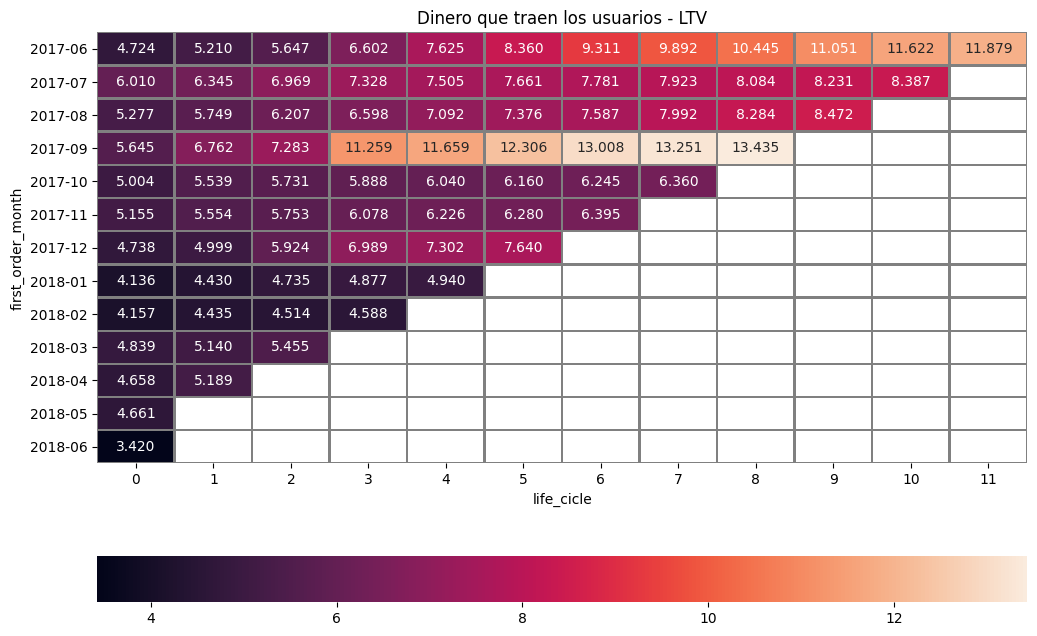

In [57]:
# Gráfica de calor de los valores LTV

cohorts_ltv.index = cohorts_ltv.index.astype(str)
    
plt.figure(figsize=(12, 8))
plt.title('Dinero que traen los usuarios - LTV')
sns.heatmap(cohorts_ltv, 
    annot=True, 
    fmt='.3f', 
    linewidths=1, 
    linecolor='grey',
    cbar_kws={'orientation': 'horizontal'})

plt.show()

Para encontrar el valor de la cantidad de dinero que traen los clientes con sus compras (LTV), fue 
necesario  calcular el número de compradores por cada mes.

De los DataFrame 'orders' y 'buyers' se obtiene cohorts_revenue, una tabla que permite posteriormente 
calcular el ciclo de vida. 

El cálculo del LTV se obtiene luego de fusionar los DataFrame cohorts_buyers y cohorts_revenue, para poder realizar la división entre los ingresos (de la tabla cohorts_revenue) y la cantidad de compradores (de la tabla cohors_buyers). Con esta información se creó una tabla dinámica con los calores de LTV para cada cohorte a lo largo del ciclo de vida. Porteriormente se graficó un mapa de calor.

De este gráfica de calor con los valores de LTV se puede concluir:
1. El primier cohorte correspondiente a junio de 2017, presentó un aumento constante en el valor del LTV a lo largo de todo su cilo de vida.
2. Los valores de LTV para cada cohorte fueron decreciendo en comparación a los valores de LTV para el primer cohorte.
3. Sin embargo, es importante anotar que se presentaron valores altos para el ciclo de vida entre el mes 3 al mes 8 del cohorte de septiembre de 2017, presentando incluso valores más altos en comparación a los valores de LTV del primer cohorte.
4. El cohorte del mes de septiembre de 2017, fue el único cohorte que a lo largo de su ciclo de vida, presentó mayores valores de LTV en comparación al primer cohorte.

### **2.3 Marketing**

#### **2.3.1 ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)**

In [58]:
print('Los costos totales de marketing son:', costs['costs'].sum())

Los costos totales de marketing son: 329131.62


In [59]:
# Extraer los costos mensuales de marketing y agragarlos al DataFrame 'costs'

costs['costs_month'] = costs['dt'].dt.to_period('M')

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   source_id    2542 non-null   int64         
 1   dt           2542 non-null   datetime64[ns]
 2   costs        2542 non-null   float64       
 3   costs_month  2542 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), period[M](1)
memory usage: 79.6 KB


In [60]:
# Tabla dinańmica de los costos mensuales

costs_month_pt = costs.pivot_table(
    index = 'costs_month',
    values = 'costs',
    aggfunc = 'sum')

costs_month_pt

,costs
costs_month,
2017-06,18015.00
2017-07,18240.59
2017-08,14790.54
2017-09,24368.91
2017-10,36322.88
2017-11,37907.88
2017-12,38315.35
2018-01,33518.52
2018-02,32723.03


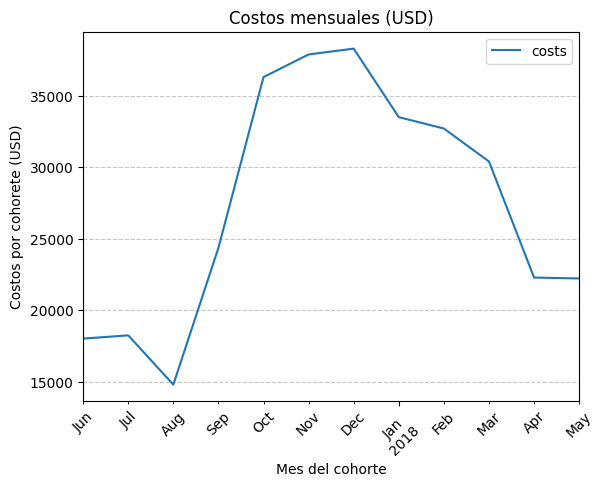

In [61]:
# Gráfica de visualización de compras mensuales

costs_month_pt.plot(title='Costos mensuales (USD)', xlabel="Mes del cohorte", ylabel='Costos por cohorete (USD)', rot=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [62]:
# Dinero gastado por fuente de adquisición

costs_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()

costs_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [63]:
# Tabla dinańmica del dinero gastado

costs_cohorts = costs.pivot_table(
    index = 'costs_month', 
    columns = 'source_id', 
    values = 'costs',
    aggfunc = 'sum')

costs_cohorts

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


<Figure size 1400x700 with 0 Axes>

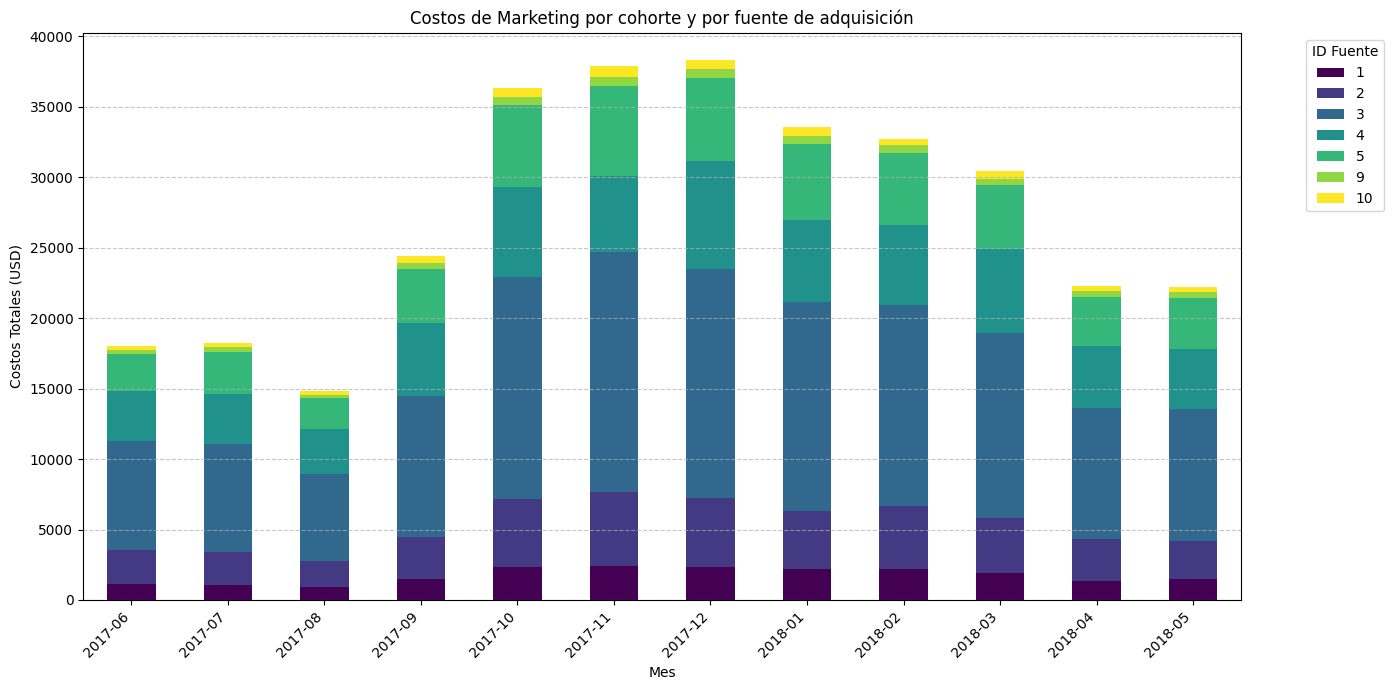

In [64]:
costs_melted = costs_cohorts.reset_index().melt(
    id_vars='costs_month',
    var_name='source_id',
    value_name='total_costs')

plt.figure(figsize=(14, 7))

# Para graficar las barras apiladas en cada cohorte, utilizar el DataFrame costs_cohorts, con 'costs_month' como columna
costs_cohorts_reset = costs_cohorts.reset_index()
costs_cohorts_reset['costs_month_str'] = costs_cohorts_reset['costs_month'].astype(str)

costs_cohorts_reset.set_index('costs_month_str').plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    cmap='viridis')

plt.title('Costos de Marketing por cohorte y por fuente de adquisición')
plt.xlabel('Mes')
plt.ylabel('Costos Totales (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='ID Fuente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Al ejecutar todo el notebook desde cero esta celda no puede ser ejecutada ya que el nombre de la variable costs_cohorts_reset no ha sido definida antes
</div>

El total del dinero gastado en marketing se obtuvo de la suma de los costos del DataFrame de 'costs', obteniendo un valor de 329131.62 USD.

Luego se extrajo la fecha por mes de los costos y se creo una tabla con la suma de los costos mensuales. Tanto en la tabla como en la gráfica de cosotos mensuales, se puede observar que los mayores gastos se presentaron entre los meses de octubre a diciembre de 2017, teniendo gastos por encima de los 35000 USD mensuales para estos meses.

El siguiente cálculo, fue encontrar los costos por fuente de adquisicón. De esta tabla se puede concluir que la fuente de adquisición que presentó el costo más elevado (141321.63 USD) fue la fuente 3.

Posteriormente se realizó una tabla, en donde los obtuvo los costos mesnuales para cada fuente de adquisición y realizó una gráfia de barras.

De esta gráfica se puede concluir:
1. Los meses que mayores gastos tuvieron en marketing fueron los meses de octubre, noviembre y diciembre de 2017, con valores por encima de los 30000 USD mensuales.
2. Los meses de enero, febrero y marzo tuvieron gastos mensuales entre 30000 y 33000 USD.
3. Los otros meses de análisis tuvieron gastos por debajo de los 25000 USD mensuales.
4. La fuente que más gasto generó fue la fuente de adquisición 3 en todos los meses de este análisis.
5. Las fuentes de adquisición que menos gastos generaron fueron la fuente 9 y 10.

#### **2.3.2 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

In [65]:
# Dinero gastado por fuente de adquisición

costs_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()

costs_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [66]:
# Obtención del DataFrame de orders extrayendo fechas de compra

orders['buy_dt'] = orders['session_buy_ts'].dt.date

orders['order_month'] = orders['session_buy_ts'].dt.to_period('M')

orders.head()

,session_buy_ts,revenue,uid,buy_dt,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06


In [67]:
# Unir los DataFrame 'visits' y 'orders' con la columna 'uid'

visits_orders = visits.merge(orders, on='uid', how='inner')

visits_orders.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_month,session_week,session_date,session_duration,session_buy_ts,revenue,buy_dt,order_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05,2018-05-14/2018-05-20,2018-05-20,24.0,2018-03-09 20:25:00,2.33,2018-03-09,2018-03
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03,2018-03-05/2018-03-11,2018-03-09,28.0,2018-03-09 20:25:00,2.33,2018-03-09,2018-03
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09,2017-08-28/2017-09-03,2017-09-03,1.0,2017-09-04 12:46:00,2.44,2017-09-04,2017-09
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09,2017-08-28/2017-09-03,2017-09-03,1.0,2017-10-28 00:01:00,1.53,2017-10-28,2017-10
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09,2017-08-28/2017-09-03,2017-09-03,1.0,2017-10-28 19:16:00,1.53,2017-10-28,2017-10


In [68]:
# Encontrar la cantidad de usuarios por fuente de adquisición

customer_source = visits_orders.groupby('source_id').agg({'uid': 'nunique'}).reset_index()

customer_source

,source_id,uid
0,1,7138
1,2,7305
2,3,13846
3,4,14253
4,5,10156
5,7,1
6,9,2793
7,10,1773


In [69]:
# Unir el DataFrame costs_source y customer_source

costs_customer_source = costs_source.merge(customer_source)

costs_customer_source

,source_id,costs,uid
0,1,20833.27,7138
1,2,42806.04,7305
2,3,141321.63,13846
3,4,61073.60,14253
4,5,51757.10,10156
5,9,5517.49,2793
6,10,5822.49,1773


In [70]:
# Calcular el costo de adquisición de cleintes de cada una de las fuentes

costs_customer_source['cac'] = costs_customer_source['costs'] / costs_customer_source['uid']

costs_customer_source

,source_id,costs,uid,cac
0,1,20833.27,7138,2.918642
1,2,42806.04,7305,5.859828
2,3,141321.63,13846,10.206676
3,4,61073.60,14253,4.284965
4,5,51757.10,10156,5.096209
5,9,5517.49,2793,1.975471
6,10,5822.49,1773,3.283976


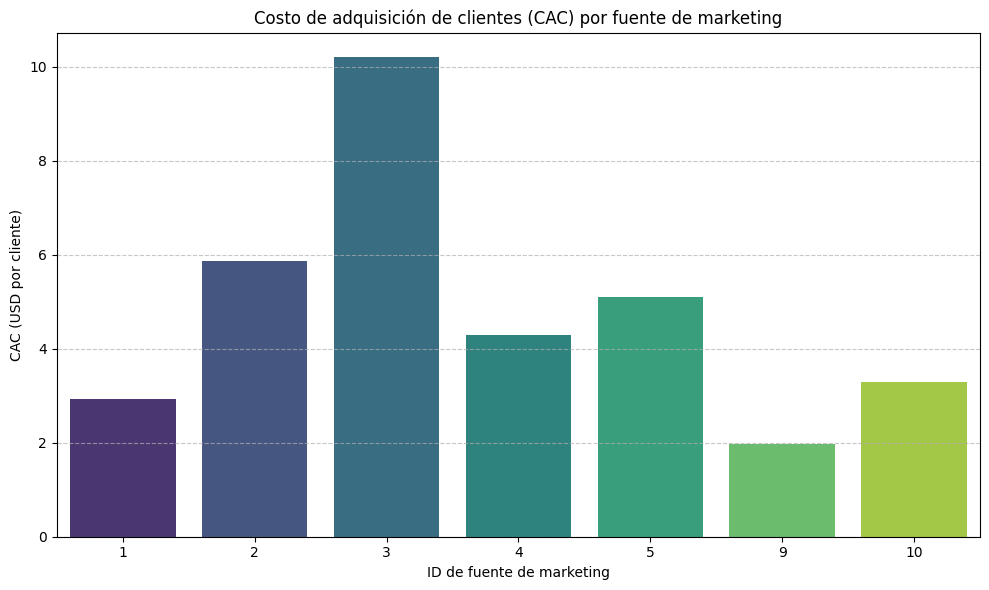

In [71]:
# Gráfica del costo de adquisicón por fuente 

plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura

sns.barplot(
    x='source_id', # Las fuentes en el eje X
    y='cac',                   # El CAC en el eje Y
    data=costs_customer_source,
    palette='viridis'          # Puedes probar otras paletas como 'Blues', 'plasma', 'magma'
)

plt.title('Costo de adquisición de clientes (CAC) por fuente de marketing')
plt.xlabel('ID de fuente de marketing')
plt.ylabel('CAC (USD por cliente)')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()

plt.show()

Para obtener el costo de adquisición de clientes, se utilizó el DataFrame costs_source el cual contiene los cosotos por fuente de adquisición. 
Luego, se unieron los DataFrame de visits y orders por la columna 'uid', el DataFrame resultante es visits_order. De esta tabla se obtuvo una nueva tabla, customers_source solamente con las fuentes y los usuarios de cada una de las fuentes.
Posteriormente, se unieron los DataFrame costs_source y customer_source, obteniendo la tabla costs_customer_source con la cual se calculó el costo de adquisición de clientes por cada una de las fuentes.

Se obtubo una gráfiaca, de ella se concluye lo siguiente:
1. La fuente de adquisición de marketing que costó más para adquirir cada cliente fue la source_id 3, teniendo un valor de más de 10 USD por cada cliente.
2. La fuente de adquisición de marketing que menos gasto generó para adquirir clientes fue la source_id 9, teniendo un valor 2 USD por cada cliente.
3. Las fuente de adquisición de marketing 1 y 10 tuvieron valores similares 3 y 3.2 USD por cada cliente, mientras que las fuentes 2, 4 y 5 tuvieron valores entre 4.2 y 5.8 USD en la adquisición de cada cliente.

#### **2.3.3 ¿Cuán rentables eran las inversiones?  (ROMI)**

In [72]:
# Unir los DataFrame 'visits' y 'orders' con la columna 'uid'

visits_orders = visits.merge(orders, on='uid', how='inner')

visits_orders.head()

,device,session_end_ts,source_id,session_start_ts,uid,session_month,session_week,session_date,session_duration,session_buy_ts,revenue,buy_dt,order_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05,2018-05-14/2018-05-20,2018-05-20,24.0,2018-03-09 20:25:00,2.33,2018-03-09,2018-03
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03,2018-03-05/2018-03-11,2018-03-09,28.0,2018-03-09 20:25:00,2.33,2018-03-09,2018-03
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09,2017-08-28/2017-09-03,2017-09-03,1.0,2017-09-04 12:46:00,2.44,2017-09-04,2017-09
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09,2017-08-28/2017-09-03,2017-09-03,1.0,2017-10-28 00:01:00,1.53,2017-10-28,2017-10
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09,2017-08-28/2017-09-03,2017-09-03,1.0,2017-10-28 19:16:00,1.53,2017-10-28,2017-10


In [73]:
# Encontrar los  ingresos, compras de los usuarios por fuente de adquisición

revenue_source = visits_orders.groupby('source_id').agg({'revenue': 'sum'}).reset_index()

revenue_source

,source_id,revenue
0,1,2.298200e+06
1,2,2.638189e+06
2,3,2.966880e+05
3,4,4.966902e+05
4,5,1.181477e+06
5,7,1.220000e+00
6,9,3.634225e+04
7,10,1.461923e+04


In [74]:
# Encontrar la cantidad de usuarios por fuente 

customer_source = visits_orders.groupby('source_id').agg({'uid': 'nunique'}).reset_index()

customer_source

,source_id,uid
0,1,7138
1,2,7305
2,3,13846
3,4,14253
4,5,10156
5,7,1
6,9,2793
7,10,1773


In [75]:
# Unir los DataFrame revenue_source y customer_source

source_ltv = pd.merge(revenue_source, customer_source, on='source_id')

source_ltv

,source_id,revenue,uid
0,1,2.298200e+06,7138
1,2,2.638189e+06,7305
2,3,2.966880e+05,13846
3,4,4.966902e+05,14253
4,5,1.181477e+06,10156
5,7,1.220000e+00,1
6,9,3.634225e+04,2793
7,10,1.461923e+04,1773


In [76]:
# Cálculo de LTV, dinero que traen los usuarios por fuente de adquisición

source_ltv['ltv'] = source_ltv['revenue'] / source_ltv['uid']

source_ltv

,source_id,revenue,uid,ltv
0,1,2.298200e+06,7138,321.966961
1,2,2.638189e+06,7305,361.148420
2,3,2.966880e+05,13846,21.427702
3,4,4.966902e+05,14253,34.848114
4,5,1.181477e+06,10156,116.332920
5,7,1.220000e+00,1,1.220000
6,9,3.634225e+04,2793,13.011905
7,10,1.461923e+04,1773,8.245477


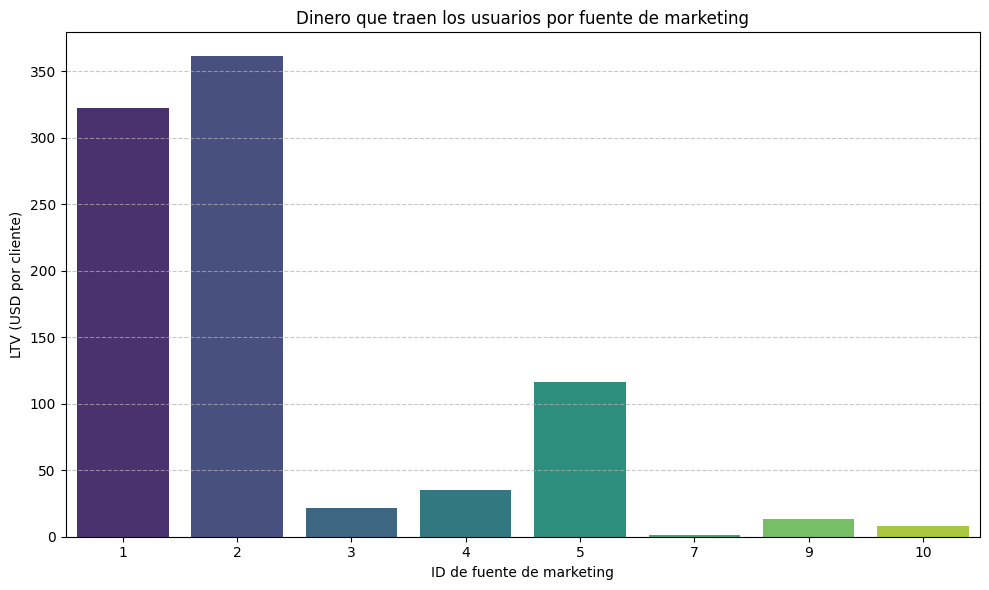

In [77]:
# Gráfica de LTV por fuente de adquisición 

plt.figure(figsize=(10, 6)) 

sns.barplot(
    x='source_id', 
    y='ltv',                  
    data=source_ltv,
    palette='viridis')

plt.title('Dinero que traen los usuarios por fuente de marketing')
plt.xlabel('ID de fuente de marketing')
plt.ylabel('LTV (USD por cliente)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 

plt.show()

In [78]:
report = source_ltv.merge(costs_customer_source, on=['source_id', 'uid'], how='inner')

report

,source_id,revenue,uid,ltv,costs,cac
0,1,2.298200e+06,7138,321.966961,20833.27,2.918642
1,2,2.638189e+06,7305,361.148420,42806.04,5.859828
2,3,2.966880e+05,13846,21.427702,141321.63,10.206676
3,4,4.966902e+05,14253,34.848114,61073.60,4.284965
4,5,1.181477e+06,10156,116.332920,51757.10,5.096209
5,9,3.634225e+04,2793,13.011905,5517.49,1.975471
6,10,1.461923e+04,1773,8.245477,5822.49,3.283976


In [79]:
# Encontrar la rentabilidad de las inversiones, ROMI

report['romi'] = ((report['ltv'] - report['cac']) / report['cac']) * 100

report

,source_id,revenue,uid,ltv,costs,cac,romi
0,1,2.298200e+06,7138,321.966961,20833.27,2.918642,10931.394351
1,2,2.638189e+06,7305,361.148420,42806.04,5.859828,6063.123732
2,3,2.966880e+05,13846,21.427702,141321.63,10.206676,109.938111
3,4,4.966902e+05,14253,34.848114,61073.60,4.284965,713.264930
4,5,1.181477e+06,10156,116.332920,51757.10,5.096209,2182.734427
5,9,3.634225e+04,2793,13.011905,5517.49,1.975471,558.673600
6,10,1.461923e+04,1773,8.245477,5822.49,3.283976,151.082097


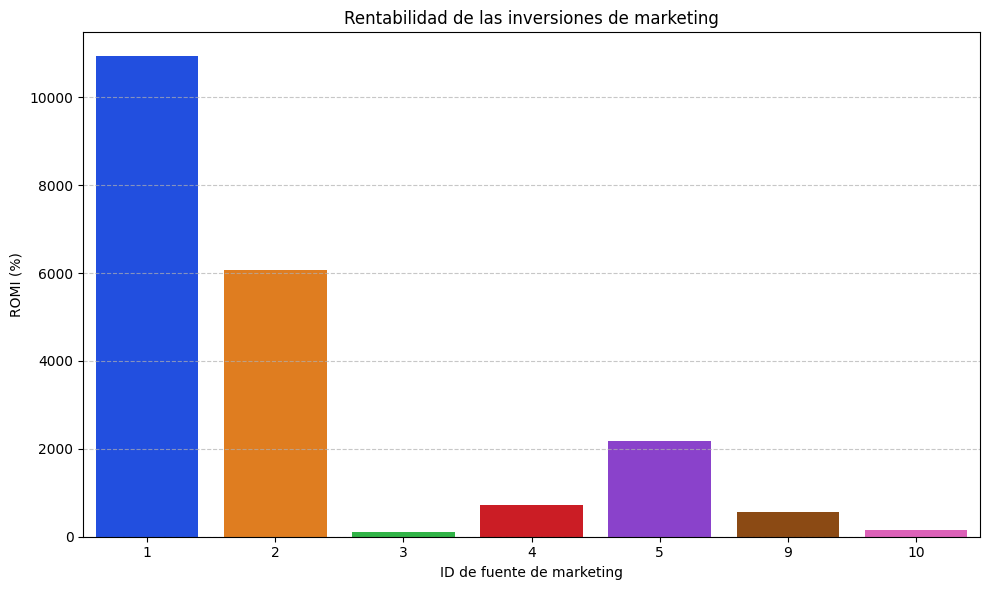

In [80]:
# Gráfica de rentabilidad de las inversiones

plt.figure(figsize=(10, 6)) 

sns.barplot(
    x='source_id', 
    y='romi',                  
    data=report,
    palette='bright')

plt.title('Rentabilidad de las inversiones de marketing')
plt.xlabel('ID de fuente de marketing')
plt.ylabel('ROMI (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 

plt.show()

Para poder conocer la rentabilidad de las inversiones de marketing, fue necesario realizar el cálculo del dinero que traían los clientes por fuente de adquisición, LVT. Para encontrar estos valores se utilizó la tabla visits_orders, se agrupó por fuente y se sumaron los ingresos de cada fuente, obteniendo el DataFrame revenue_source.
Luego se unieron las tablas revenue_source con la tabla obtenida anteriormente customer_source con los clientes por fuente, en el DataFrame source_ltv.
Posteriormente se calcularon los valores LTV para cada fuente de adquisición de marketing y se realizó una gráfica de barras.

De la gráfica se puede concluir lo siguiente:
1. Las fuentes de adquisicón que más dinero traen a Showz son las de source_id 1 con 322 USD y la source_id 2 con 361 USD.
2. Descartando la fuente de marketing source_id 7 (ver la tabla source_ltv con solamente 1 comprador), las fuentes con menor cantidad de dinero que lo clientes trajeron al sitio web fueron las de source_id 9 y 10, teniendo valores 13 USD y 8 USD respectivamente.
3. Otra de las fuentes que atrajo poco dinero a Show fue la source_id 3 con un valor de 21 USD por cliente.

Una vez obtenido el LTV por fuente, se procedió a calcular la rentabilidad de las inversiones (ROMI) utilizando el cálculo del CAC por fuente del punto anterior.

Del DataFrame de 'report' y de la gráfica del ROMI, se concluye lo siguiente:
1. La fuente de adquisición de marketing más rentable, es la fuente con source_id 1, seguida por la fuente con source_id 2.
2. Aunque la fuente source_id 2 tuvo una muy buena rentabilidad, la fuente 1 casi duplica la rentabilidad de la fuente 2.
3. Las dos fuentes con menos rentabilidad son la fuente con source_id 3 y 10.

### **Paso 3. Conclusiones**

Luego de analizar el comportamiento de los usuarios en la visitas al sitio web, las compras realizadas y los costos de marketing, con los datos suministrados del periodo de junio de 2017 a mayo de 2018, tengo los siguientes comentarios:

1. Las visitas promedio de los usuarios al sitio web de Showz, diariamente son de 907 visitantes (DAU), las visitas semanales tienen un promedio de 5825 visitantes (WAU), mientras las mensuales son de 23228 visitantes (MAU).
   
2. El promedio de visitas diarias es de 1 visita al día, mientras que la duración de cada visita en promedio es alrededor de 11 min. Además, de la del histograma se puede concluir que la mayor frecuencia de duración de la sesión de los usuarios se da entre 0 y 28 minutos aproximadamente.

3. En cuanto a la frecuencia con la que regresan los usuarios, se puede asumir como la retención de usuraios. El primier cohorte es el que muestra mayor tasa de retención de todos los cohortes a lo largo del ciclo de vida obteniendo valores entre 4.5 y 7.9%. El mayor valor de retención, entendiéndose como la mayor frecuencia de regreso de los usuarios al sitio web se dio en el segundo mes del cohorte de septiembre de 2017. Sin embargo, analizando todos los resultados en conjunto, la frecuencia con que los usuarios regresan al sitio web es relativamente baja, en ningune cohorte supera el 10 de retención de usuarios. Al parecer, el interés de los usuarios por el sitio web va disminuyendo a lo largo del tiempo de este análisis.

4. Las personas que visitan el sitio web de Showz y se convierten en compradores, la mayoría de ellos se toman en promedio de 0 a 3 días para realizar su primera compra; alrededor de unos 28.000 usuarios se convierten en compradores en este tiempo. Entre 500 y 1000 usuarios se tardan alrededor de unos 20 días para su primera compra. Parece ser que si Showz realiza campañas de marketing, son efectivas los primeros 3 días, pero transcurrido el tiempo pierde fuerza y generan poca recordación del sitio web.

5. El promedio de órdenes por cliente es de 1.43 para todos los cohortes. Pero es importante anotar que los compradores del primer cohorte correspondiente a junio de 2017 llegaron a alcanzar hasta 2 pedidos por cliente para los últimos 5 meses de este cohorte.

6.  En la gráfica Promedio de compras mensules, se puede ver que los valores oscilan entre 4 y 5.8, siendo el cohorte del mes de diciembre de 2017 el que presenta un mayor promedio de compras. La época de navidad pudo influir en este valor, al ser la época del año en la que los usuarios están dispuestos a comprar más. El promedio del tamaño de la comprar para todos los meses es de 5.

7.  El primer cohorte correspondiente a junio de 2017, presentó un aumento constante en el valor del LTV a lo largo de todo su ciclo de vida. Los valores de LTV para cada cohorte fueron decreciendo en comparación a los valores de LTV para el primer cohorte. Sin embargo, es importante anotar que se presentaron valores altos para el ciclo de vida entre el mes 3 al mes 8 del cohorte de septiembre de 2017, presentando incluso valores más altos en comparación a los valores de LTV del primer cohorte.

8.  Los meses que mayores gastos tuvieron en marketing fueron los meses de octubre, noviembre y diciembre de 2017, con valores por encima de los 30000 USD mensuales.
Los meses de enero, febrero y marzo tuvieron gastos mensuales entre 30000 y 33000 USD mensuales.
Los otros meses de análisis tuvieron gastos por debajo de los 25000 USD mensuales.
La fuente que más gasto generó fue la fuente de adquisición 3 en todos los meses de este análisis.
Las fuentes de adquisición que menos gastos generaron fueron la fuente 9 y 10.

9. CAC, por fuente. La fuente de adquisición de marketing que generó más gasto para adquirir cada cliente fue la source_id 3, teniendo un valor de más de 10 USD por cada cliente. Mientras que la fuente de adquisición de marketing que menos gasto generó para adquirir clientes fue la source_id 9, teniendo un valor 2 USD por cada cliente. Las demás fuentes de marketing tuvieron costos entre los 3 y los 5.8 USD por cada cliente adquirido.

10. LTV por fuente. Las fuentes de adquisición que más dinero traen a Showz son las de source_id 1 con 322 USD y la source_id 2 con 361 USD. Las fuentes con menor cantidad de dinero que lo clientes trajeron al sitio web fueron las de source_id 9 y 10, teniendo valores 13 USD y 8 USD respectivamente. Otra de las fuentes que atrajo poco dinero a Show fue la source_id 3 con un valor de 21 USD por cliente.

11. ROMI. La fuente de adquisición de marketing más rentable, es la fuente con source_id 1, seguida por la fuente con source_id 2. Las dos fuentes con menos rentabilidad son la fuente con source_id 3 y 10.

### **Conlusión general**

La fuente de adquisición de clientes que generó más gastos de inversión fue la fuente 3, repercutiendo este valor en la rentabilidad de inversión siendo una de las menos rentables. 
Por otro lado, la fuente que obtuvo la mejor rentabilidad de la inversión fue la fuente 1, en promedio cada cliente atrajo al sitio web de Showz 322 UDS, por un costo de marketing para atraer a ese cliente de sólo 3 USD. Considero que esta campaña de marketing fue la que presentó mejores resultados. Aunque las fuentes de adquisición de clientes 9 y 10 fueron las menos costosas, también fueron de las que menos ingresos atrajeron a Showz, por lo tanto no son eficientes ni recomendables para unas próximas campañas de marketing.

Uno de los puntos que el departamento de marketing debe mejorar es en la tasa de retención de clientes. Para aumentar la frecuencia con que los usuarios regresan al sitio web a lo largo del ciclo de vida de cada cohorte, se recomienda hacerlo más accesible, más amigable, de fácil recordación, o hacer campañas que atraigan el interés frecuente de los usuarios. Quizá hacer un estudio de marketing para tener más claro el público objetivo, conocer a profundidad el nicho de mercado para llegar a la audiencia de una forma más adecuada y generar así una mayor fidelización de los compradores no solo en los tiempos de campañas de marketing si no también a lo largo del tiempo.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

En general tienes un muy buen proceso de análisis Constanza!

Siempre este tipo de análisis que son un poco más complejos hay que buscar cómo explicarlos de manera sencilla considerando la audiencia a la cual se va a presentar los resultados y es ahí donde las visualizaciones juegan un papel muy importante ya que con una visualización es mucho más fácil entender la explicación que con solo valores numéricos.

La única razón por la que regreso tu proyecto es porque hubo una celda donde se produjo un error debido al uso incorrecto del nombre de una variable.

Muy buen trabajo, saludos!
</div>